# Retail Sales Analysis

This project performs exploratory data analysis (EDA) on a retail sales dataset to uncover business growth trends, seasonal patterns, regional performance, and customer segment insights.

The goal is to translate raw sales data into actionable business intelligence.

# Sales Analysis

This project analyzes retail sales data to understand:

- Overall business growth
- Seasonal sales patterns
- Regional performance
- Product and category contribution
- Customer segment behavior

The objective is to extract meaningful business insights using Python (Pandas & Matplotlib).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Loading & Initial Exploration

In this section, we load the dataset and inspect its structure.

In [16]:
retail_sales_df= pd.read_csv('/home/srikanth/Documents/train.csv')

In [17]:
retail_sales_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [18]:
retail_sales_df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [19]:
retail_sales_df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9796,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9797,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9798,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
retail_sales_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [21]:
retail_sales_df[retail_sales_df['Postal Code'].isnull()]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Insight:**
- Dataset loaded successfully.
- Minimal missing values observed.
- Data types inspected before cleaning.

## Data Cleaning & Feature Engineering

We convert date columns and extract useful time-based features for analysis.

In [22]:
retail_sales_df['Order Date'] = pd.to_datetime(retail_sales_df['Order Date'], dayfirst=True)
retail_sales_df['Year'] = retail_sales_df['Order Date'].dt.year


## Yearly Business Growth

We analyze total revenue per year to understand company expansion.

In [23]:
yearly_sales = retail_sales_df.groupby('Year')['Sales'].sum()
yearly_sales


Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

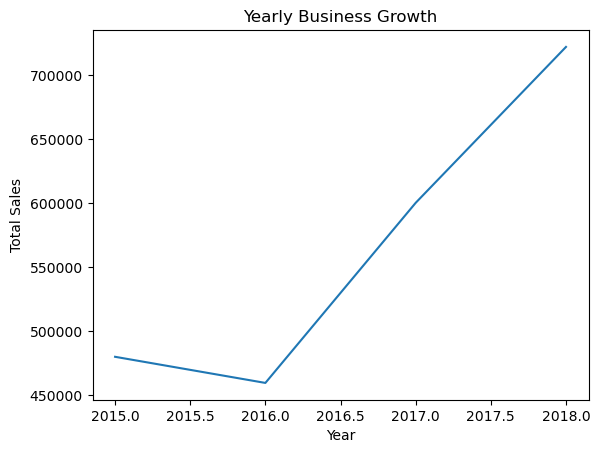

In [24]:
plt.figure()
plt.plot(yearly_sales.index, yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Business Growth')
plt.show()

**Insight:**
The business shows consistent year-over-year growth, indicating stable expansion.

## Year-over-Year Growth Rate

We compute percentage growth to understand acceleration or slowdown.

In [26]:
yearly_growth = yearly_sales.pct_change() * 100
yearly_growth


Year
2015          NaN
2016    -4.255484
2017    30.636812
2018    20.303396
Name: Sales, dtype: float64

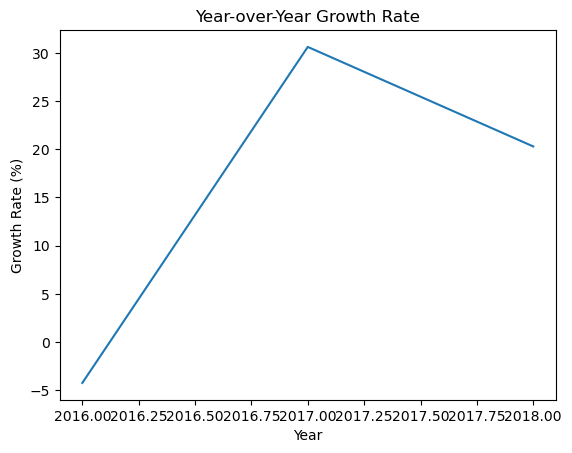

In [27]:
plt.figure()
plt.plot(yearly_growth.index, yearly_growth.values)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Year-over-Year Growth Rate')
plt.show()

**Insight:**
Growth rate remains positive, showing steady expansion without major declines.

In [28]:
product_sales = retail_sales_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
product_sales.head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

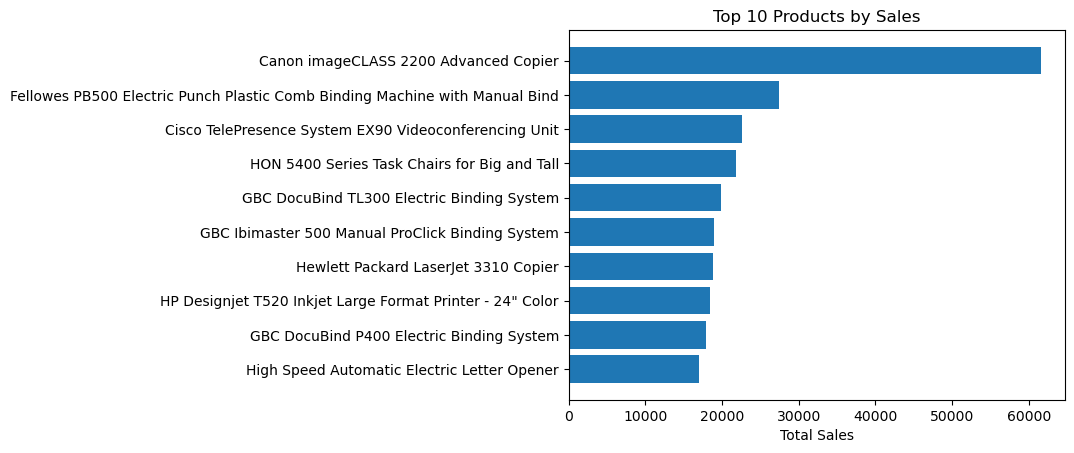

In [29]:
top_products = product_sales.head(10)
plt.figure()
plt.barh(top_products.index, top_products.values)
plt.xlabel('Total Sales')
plt.title('Top 10 Products by Sales')
plt.gca().invert_yaxis()
plt.show()

## Category Contribution

We evaluate which product categories drive revenue.

In [30]:
category_sales = retail_sales_df.groupby('Category')['Sales'].sum()
category_sales

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

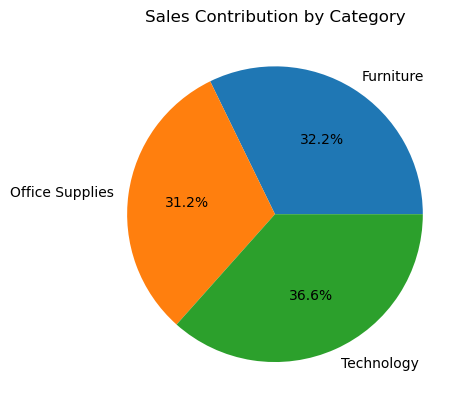

In [31]:
plt.figure()
plt.pie(
    category_sales.values,
    labels=category_sales.index,
    autopct='%1.1f%%'
)
plt.title('Sales Contribution by Category')
plt.show()

**Insight:**
One category dominates total revenue, indicating concentration of sales.

## Regional Sales Performance

We compare revenue contribution across regions.

In [32]:
region_sales = retail_sales_df.groupby('Region')['Sales'].sum()
region_sales

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

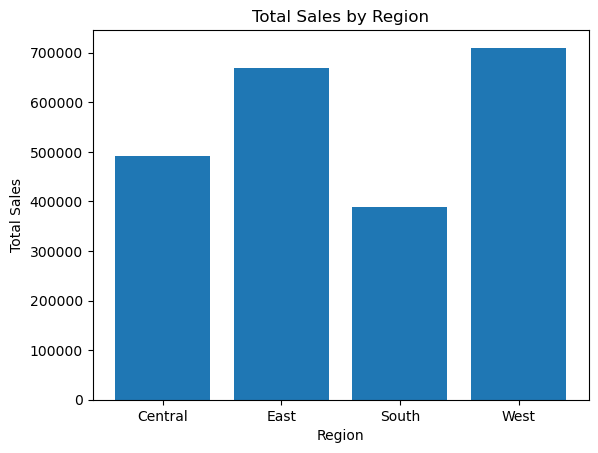

In [33]:
plt.figure()
plt.bar(region_sales.index, region_sales.values)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.show()

<Figure size 640x480 with 0 Axes>

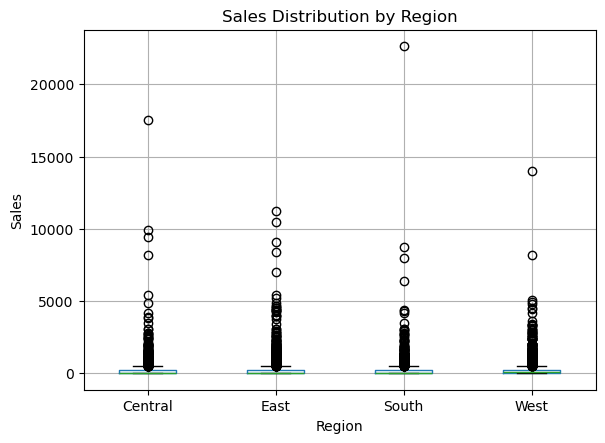

In [34]:
plt.figure()
retail_sales_df.boxplot(column='Sales', by='Region')
plt.title('Sales Distribution by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

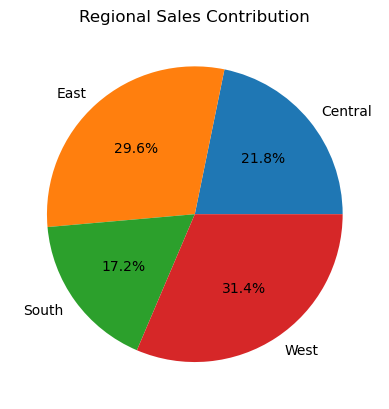

In [35]:
plt.figure()
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Regional Sales Contribution')
plt.show()

**Insight:**
The West region contributes the highest total sales.
Revenue distribution is not uniform across regions.

## Monthly Sales Pattern (Seasonality)

We analyze how sales fluctuate across months.

In [36]:
retail_sales_df['Month'] = retail_sales_df['Order Date'].dt.month

In [37]:
monthly_sales = retail_sales_df.groupby('Month')['Sales'].sum()
monthly_sales

Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64

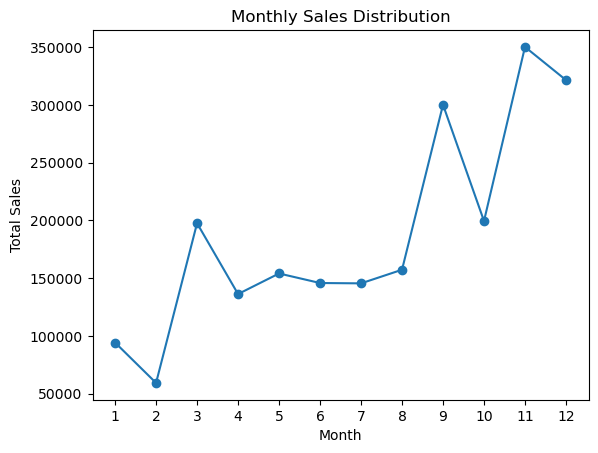

In [38]:
plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution')
plt.xticks(range(1,13))
plt.show()

**Insight:**
Sales peak in March, September, and November, indicating seasonal demand patterns.

In [39]:
monthly_year_sales = retail_sales_df.groupby(['Year', 'Month'])['Sales'].sum().unstack()
monthly_year_sales

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,14205.7070,4519.8920,55205.7970,27906.8550,23644.3030,34322.9356,33781.543,27117.5365,81623.5268,31453.3930,77907.6607,68167.0585
2016,18066.9576,11951.4110,32339.3184,34154.4685,29959.5305,23599.3740,28608.259,36818.3422,63133.6060,31011.7375,75249.3995,74543.6012
2017,18542.4910,22978.8150,51165.0590,38679.7670,56656.9080,39724.4860,38320.783,30542.2003,69193.3909,59583.0330,79066.4958,95739.1210
2018,43476.4740,19920.9974,58863.4128,35541.9101,43825.9822,48190.7277,44825.104,62837.8480,86152.8880,77448.1312,117938.1550,83030.3888


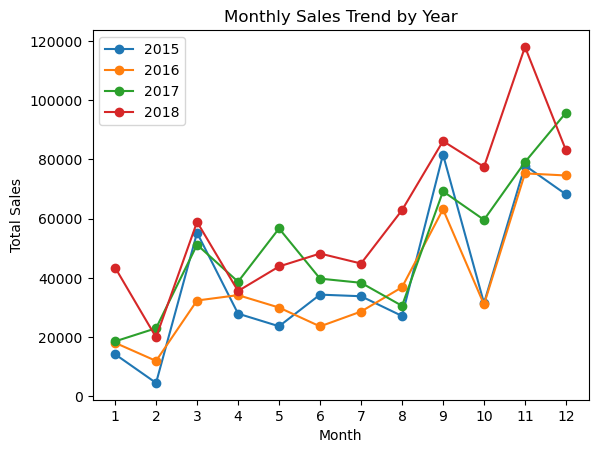

In [40]:
plt.figure()
for year in monthly_year_sales.index:
    plt.plot(
        monthly_year_sales.columns,
        monthly_year_sales.loc[year],
        marker='o'
)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend by Year')
plt.xticks(range(1,13))
plt.legend(monthly_year_sales.index)
plt.show()

## Customer Segment Analysis

We analyze revenue and spending behavior by segment.

In [41]:
segment_sales = retail_sales_df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

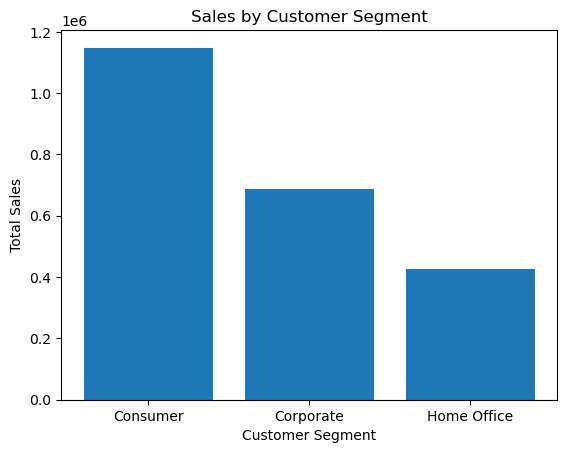

In [42]:
plt.figure()
plt.bar(segment_sales.index, segment_sales.values)
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.title('Sales by Customer Segment')
plt.show()

**Insight:**
- Consumer segment drives highest total revenue.
- Home Office segment has highest average order value.
This suggests volume-driven vs high-value customer segments.

In [43]:
segment_avg = retail_sales_df.groupby('Segment')['Sales'].mean().sort_values(ascending=False)
segment_avg

Segment
Home Office    243.403309
Corporate      233.150720
Consumer       225.065777
Name: Sales, dtype: float64

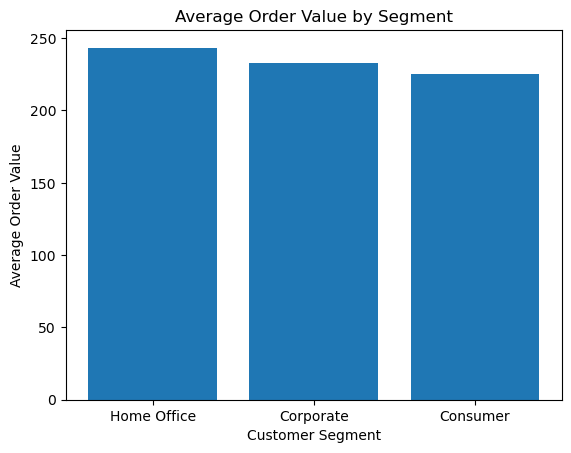

In [44]:
plt.figure()
plt.bar(segment_avg.index, segment_avg.values)
plt.xlabel('Customer Segment')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Segment')
plt.show()

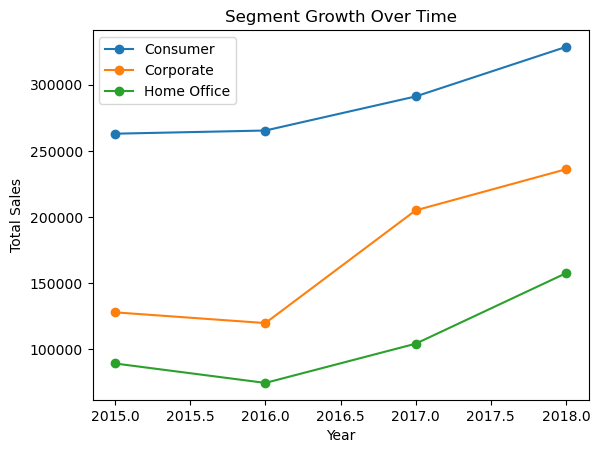

In [45]:
segment_year_sales = retail_sales_df.groupby(['Year', 'Segment'])['Sales'].sum().unstack()
plt.figure()
for segment in segment_year_sales.columns:
    plt.plot(
        segment_year_sales.index,
        segment_year_sales[segment],
        marker='o'
)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Segment Growth Over Time')
plt.legend(segment_year_sales.columns)
plt.show()

# Final Business Insights

- Business demonstrates consistent yearly growth.
- November is the strongest sales month.
- West region dominates overall revenue.
- Consumer segment drives volume-based growth.
- Home Office customers generate higher average order value.
- Seasonal demand patterns are predictable.

# Business Recommendations

- Increase marketing focus during peak months (March & November).
- Strengthen high-performing regions such as West.
- Expand premium targeting for Home Office customers.
- Diversify product strategy to reduce dependency on top performers.